#**-------------------------------------TRABALHO PST---------------------------------------**

## **NOTEBOOK 6 | Regressores e Intervalos de Previsão**

**Realizado por:**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

---------------------------------------------------------
**Dataset escolhido:**
- Foods1_CA4 -> Departamento Foods1 da loja 4 do Estado da Califórnia

## **1. IMPORTS**

In [ ]:
!pip install StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from neuralforecast.losses.pytorch import MQLoss
from neuralforecast.losses.pytorch import MAE

from sklearn import metrics
from utilsforecast.plotting import plot_series

## **2. DATA UPLOAD**

### Data upload: fazer upload dos ficheiros 'Foods1_CA4.csv' e 'results_PST5'

In [ ]:
uploaded = files.upload()

if 'Foods1_CA4.csv' in uploaded and 'results_PST5.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['Foods1_CA4.csv']), parse_dates=['ds'])
    Models_results = pd.read_csv(io.BytesIO(uploaded['results_PST5.csv']), sep=',')
    print("Both files uploaded successfully.")
else:
    print("Please ensure both 'Foods1_CA4.csv' and 'results_PST5.csv' are uploaded.")

df

Saving Foods1_CA4.csv to Foods1_CA4.csv
Saving results_PST5.csv to results_PST5.csv
Both files uploaded successfully.


,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


## **3. AVALIAÇÃO DO MELHOR MODELO**

### Avaliação do melhor modelo pré-regressores

In [ ]:
Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179
2,AutoARIMA,2.778064,1.043241,1.666753,0.797254,1.010537
3,AutoETS,2.722531,1.036994,1.650009,0.789245,1.004485
4,XGBoost,3.275633,1.053321,1.809871,0.865711,1.020301
5,LightGBM,3.013774,1.134485,1.736022,0.830388,1.098920
6,AutoNHITS,2.996018,0.959077,1.730901,0.827938,0.929011
7,AutoLSTM,3.290443,0.973242,1.813958,0.867666,0.942733


Como referido no Notebook PST5, o AutoNHITS e o AutoLSTM superam os restantes modelos, especialmente na MASE e na MAE. Isto mostra que os modelos neuronais especializados para séries temporais são eficazes neste problema.

O AutoNIHTS obtém um melhor resultado global, sendo o modelo recomendado, pois consegue capturar os padrões complexos da série de forma superior.

## **4. REGRESSORES**

### Criar variável df_regressores para os regressores

In [ ]:
base_url = 'https://datasets-nixtla.s3.amazonaws.com'

X_df = pd.read_parquet(f'{base_url}/m5_x.parquet')

In [ ]:
X_df_FOODS1 = X_df[X_df['unique_id'].str.startswith('FOODS_1')]
df_regressores = X_df_FOODS1[X_df_FOODS1['unique_id'].str.endswith('CA_4')]
df_regressores

,unique_id,ds,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
5907,FOODS_1_001_CA_4,2011-01-30,nan,nan,nan,nan,0,0,0,2.00
5908,FOODS_1_001_CA_4,2011-01-31,nan,nan,nan,nan,0,0,0,2.00
5909,FOODS_1_001_CA_4,2011-02-01,nan,nan,nan,nan,1,1,0,2.00
5910,FOODS_1_001_CA_4,2011-02-02,nan,nan,nan,nan,1,0,1,2.00
5911,FOODS_1_001_CA_4,2011-02-03,nan,nan,nan,nan,1,1,1,2.00
...,...,...,...,...,...,...,...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,nan,nan,nan,nan,0,1,1,2.24
3635184,FOODS_1_219_CA_4,2016-06-16,nan,nan,nan,nan,0,0,0,2.24
3635185,FOODS_1_219_CA_4,2016-06-17,nan,nan,nan,nan,0,0,0,2.24
3635186,FOODS_1_219_CA_4,2016-06-18,nan,nan,nan,nan,0,0,0,2.24


In [ ]:
### atualizar a variável df_regressores apenas com as colunas pretendidas

df_regressores = df_regressores[['unique_id', 'ds', 'snap_CA', 'sell_price']]
df_regressores

,unique_id,ds,snap_CA,sell_price
5907,FOODS_1_001_CA_4,2011-01-30,0,2.00
5908,FOODS_1_001_CA_4,2011-01-31,0,2.00
5909,FOODS_1_001_CA_4,2011-02-01,1,2.00
5910,FOODS_1_001_CA_4,2011-02-02,1,2.00
5911,FOODS_1_001_CA_4,2011-02-03,1,2.00
...,...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,0,2.24
3635184,FOODS_1_219_CA_4,2016-06-16,0,2.24
3635185,FOODS_1_219_CA_4,2016-06-17,0,2.24
3635186,FOODS_1_219_CA_4,2016-06-18,0,2.24


In [ ]:
### verificar se dá match com o shape de df_regressores

df.shape

(355373, 3)

### Conjunto de treino e teste

In [ ]:
Y_train = df[df['ds'] <= '2016-05-22']
Y_test = df[df['ds'] > '2016-05-22']

X_train = df_regressores[df_regressores['ds'] <= '2016-05-22']
X_test = df_regressores[df_regressores['ds'] > '2016-05-22']

In [ ]:
Y_train

,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355340,FOODS_1_219_CA_4,2016-05-18,3.0
355341,FOODS_1_219_CA_4,2016-05-19,2.0
355342,FOODS_1_219_CA_4,2016-05-20,2.0
355343,FOODS_1_219_CA_4,2016-05-21,6.0


In [ ]:
Y_test

,unique_id,ds,y
1940,FOODS_1_001_CA_4,2016-05-23,2.0
1941,FOODS_1_001_CA_4,2016-05-24,0.0
1942,FOODS_1_001_CA_4,2016-05-25,0.0
1943,FOODS_1_001_CA_4,2016-05-26,6.0
1944,FOODS_1_001_CA_4,2016-05-27,0.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
X_train

,unique_id,ds,snap_CA,sell_price
5907,FOODS_1_001_CA_4,2011-01-30,0,2.00
5908,FOODS_1_001_CA_4,2011-01-31,0,2.00
5909,FOODS_1_001_CA_4,2011-02-01,1,2.00
5910,FOODS_1_001_CA_4,2011-02-02,1,2.00
5911,FOODS_1_001_CA_4,2011-02-03,1,2.00
...,...,...,...,...
3635155,FOODS_1_219_CA_4,2016-05-18,0,2.24
3635156,FOODS_1_219_CA_4,2016-05-19,0,2.24
3635157,FOODS_1_219_CA_4,2016-05-20,0,2.24
3635158,FOODS_1_219_CA_4,2016-05-21,0,2.24


In [ ]:
X_test

,unique_id,ds,snap_CA,sell_price
7847,FOODS_1_001_CA_4,2016-05-23,0,2.24
7848,FOODS_1_001_CA_4,2016-05-24,0,2.24
7849,FOODS_1_001_CA_4,2016-05-25,0,2.24
7850,FOODS_1_001_CA_4,2016-05-26,0,2.24
7851,FOODS_1_001_CA_4,2016-05-27,0,2.24
...,...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,0,2.24
3635184,FOODS_1_219_CA_4,2016-06-16,0,2.24
3635185,FOODS_1_219_CA_4,2016-06-17,0,2.24
3635186,FOODS_1_219_CA_4,2016-06-18,0,2.24


### Junção dos regressores ao treino

In [ ]:
train = Y_train.merge(X_train, how='left', on=['unique_id', 'ds'])
train

,unique_id,ds,y,snap_CA,sell_price
0,FOODS_1_001_CA_4,2011-01-30,1.0,0,2.00
1,FOODS_1_001_CA_4,2011-01-31,1.0,0,2.00
2,FOODS_1_001_CA_4,2011-02-01,1.0,1,2.00
3,FOODS_1_001_CA_4,2011-02-02,1.0,1,2.00
4,FOODS_1_001_CA_4,2011-02-03,1.0,1,2.00
...,...,...,...,...,...
349320,FOODS_1_219_CA_4,2016-05-18,3.0,0,2.24
349321,FOODS_1_219_CA_4,2016-05-19,2.0,0,2.24
349322,FOODS_1_219_CA_4,2016-05-20,2.0,0,2.24
349323,FOODS_1_219_CA_4,2016-05-21,6.0,0,2.24


## **5. Treino do modelo**

In [ ]:
freq = 'D'
season_length = 7
horizon = 28
level = [95]

In [ ]:
nhits_config = {
    "max_steps": 1000,
    "input_size": 2*horizon,
    "learning_rate": tune.loguniform(1e-5, 1e-1),
    "n_pool_kernel_size": tune.choice([[2, 2, 2], [16, 8, 1]]),
    "n_freq_downsample": tune.choice([[168, 24, 1], [24, 12, 1], [1, 1, 1]]),
    "val_check_steps": 50,
    "early_stop_patience_steps": 2,
    "random_seed": tune.randint(1, 10)
}


models = AutoNHITS(
        h=horizon,
        loss=MQLoss(level=level),
        config=nhits_config,
        search_alg=HyperOptSearch(),
        backend='ray',
        num_samples=20
    )

In [ ]:
nf = NeuralForecast(models=[models],
                    freq=freq
                    )

In [ ]:
import logging
logging.getLogger("ray").setLevel(logging.WARNING)  # Para menos "ruído" no output

nf.fit(df=train, val_size=horizon)

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-06-15_10-05-28   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-06-15_10-05-28
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-15_09-32-56_242317_673/artifacts/2025-06-15_10-05-28/_train_tune_2025-06-15_10-05-28/driver_artifacts`


(_train_tune pid=14272) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14272) Seed set to 6
(_train_tune pid=14272) GPU available: True (cuda), used: True
(_train_tune pid=14272) TPU available: False, using: 0 TPU cores
(_train_tune pid=14272) HPU available: False, using: 0 HPUs
(_train_tune pid=14272) 2025-06-15 10:05:42.188781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14272) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14272) E0000 00:00:1749981942.213940   14377 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.453, train_loss_epoch=0.624]
(_train_tune pid=14272) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.609, train_loss_epoch=0.578, valid_loss=0.812]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14272) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.417, train_loss_epoch=0.569, valid_loss=0.721]
(_train_tune pid=14272) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.531, train_loss_epoch=0.557, valid_loss=0.709]
(_train_tune pid=14272) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.692, train_loss_epoch=0.580, valid_loss=0.714]
(_train_tune pid=14272) 
Validation: |          | 0/? [00:00<?

(_train_tune pid=14450) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14450) Seed set to 9
(_train_tune pid=14450) GPU available: True (cuda), used: True
(_train_tune pid=14450) TPU available: False, using: 0 TPU cores
(_train_tune pid=14450) HPU available: False, using: 0 HPUs
(_train_tune pid=14450) 2025-06-15 10:06:04.812684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14450) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14450) E0000 00:00:1749981964.862600   14544 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.020, train_loss_epoch=5.550]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=20.10, train_loss_epoch=30.40, valid_loss=10.20]
(_train_tune pid=14450) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.360, valid_loss=27.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14450) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.933, train_loss_epoch=1.080, valid_loss=1.690]
(_train_tune pid=14450) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14450) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=13.60, train_loss_epoch=3.830, valid_loss=1.300]

(_train_tune pid=14614) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14614) Seed set to 2
(_train_tune pid=14614) GPU available: True (cuda), used: True
(_train_tune pid=14614) TPU available: False, using: 0 TPU cores
(_train_tune pid=14614) HPU available: False, using: 0 HPUs
(_train_tune pid=14614) 2025-06-15 10:06:27.551662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14614) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14614) E0000 00:00:1749981987.576264   14719 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.722, train_loss_epoch=0.843]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=14614) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.647, train_loss_epoch=0.765, valid_loss=1.080]
(_train_tune pid=14614) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.687, train_loss_epoch=0.770, valid_loss=0.996]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 190.09it/s]
(_train_tune pid=14614) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.691, train_loss_epoch=0.727, valid_loss=0.956]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14614) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, trai

(_train_tune pid=14861) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14861) Seed set to 7
(_train_tune pid=14861) GPU available: True (cuda), used: True
(_train_tune pid=14861) TPU available: False, using: 0 TPU cores
(_train_tune pid=14861) HPU available: False, using: 0 HPUs
(_train_tune pid=14861) 2025-06-15 10:07:01.459521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14861) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14861) E0000 00:00:1749982021.486482   14957 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.566, train_loss_epoch=0.595]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.470, train_loss_epoch=0.558, valid_loss=0.755]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14861) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.507, train_loss_epoch=0.547, valid_loss=0.714]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 205.42it/s]
(_train_tune pid=14861) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.380, train_loss_epoch=0.557, valid_loss=0.713]
(_train_tune pid=14861) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.538, train_loss_epoch=0.554, valid_loss=0.709]
(_train_tune pi

(_train_tune pid=15047) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15047) Seed set to 5
(_train_tune pid=15047) GPU available: True (cuda), used: True
(_train_tune pid=15047) TPU available: False, using: 0 TPU cores
(_train_tune pid=15047) HPU available: False, using: 0 HPUs
(_train_tune pid=15047) 2025-06-15 10:07:28.748809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15047) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15047) E0000 00:00:1749982048.772028   15152 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.616, train_loss_epoch=0.597]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.548, train_loss_epoch=0.575, valid_loss=0.754]
(_train_tune pid=15047) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.441, train_loss_epoch=0.577, valid_loss=0.718]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15047) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.699, train_loss_epoch=0.568, valid_loss=0.721]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15047) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.665, train_loss_epoch=0.568, valid_loss=0.717]
(_train_tune pid=15047) 

(_train_tune pid=15244) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15244) Seed set to 4
(_train_tune pid=15244) GPU available: True (cuda), used: True
(_train_tune pid=15244) TPU available: False, using: 0 TPU cores
(_train_tune pid=15244) HPU available: False, using: 0 HPUs
(_train_tune pid=15244) 2025-06-15 10:07:54.329562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15244) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15244) E0000 00:00:1749982074.359761   15345 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=89.60, train_loss_epoch=351.0]
(_train_tune pid=15244) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=5.13e+3, train_loss_epoch=5.33e+3, valid_loss=106.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.84e+3, train_loss_epoch=2.81e+3, valid_loss=3.44e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15244) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.01e+3, train_loss_epoch=2e+3, valid_loss=2.36e+3]


(_train_tune pid=15395) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15395) Seed set to 5
(_train_tune pid=15395) GPU available: True (cuda), used: True
(_train_tune pid=15395) TPU available: False, using: 0 TPU cores
(_train_tune pid=15395) HPU available: False, using: 0 HPUs
(_train_tune pid=15395) 2025-06-15 10:08:14.009801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15395) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15395) E0000 00:00:1749982094.036391   15496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.606, train_loss_epoch=0.566]
(_train_tune pid=15395) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.545, train_loss_epoch=0.569, valid_loss=0.735]
(_train_tune pid=15395) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15395) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.430, train_loss_epoch=0.560, valid_loss=0.713]
(_train_tune pid=15395) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.692, train_loss_epoch=0.552, valid_loss=0.704]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15395) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.671, train_loss_epoch

(_train_tune pid=15572) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15572) Seed set to 6
(_train_tune pid=15572) GPU available: True (cuda), used: True
(_train_tune pid=15572) TPU available: False, using: 0 TPU cores
(_train_tune pid=15572) HPU available: False, using: 0 HPUs
(_train_tune pid=15572) 2025-06-15 10:08:37.417528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15572) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15572) E0000 00:00:1749982117.437713   15675 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.440]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.230, valid_loss=1.820]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.683, train_loss_epoch=0.885, valid_loss=1.490]
(_train_tune pid=15572) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.787, train_loss_epoch=0.795, valid_loss=1.100]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15572) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.958, train_loss_epoch=0.819, valid_loss=1.040]
(_train_tune pid=15572) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          |

(_train_tune pid=15572) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=15828) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=15828) Seed set to 3
(_train_tune pid=15828) GPU available: True (cuda), used: True
(_train_tune pid=15828) TPU available: False, using: 0 TPU cores
(_train_tune pid=15828) HPU available: False, using: 0 HPUs
(_train_tune pid=15828) 2025-06-15 10:09:13.485792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=15828) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=15828) E0000 00:00:1749982153.529278   15921 cuda_dnn.cc:8310] Unable 

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.843, train_loss_epoch=0.841]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=15828) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.790, train_loss_epoch=0.739, valid_loss=1.040]
(_train_tune pid=15828) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.740, train_loss_epoch=0.651, valid_loss=0.965]
(_train_tune pid=15828) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.706, train_loss_epoch=0.587, valid_loss=0.795]
(_train_tune pid=15828) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.466, train_loss_epoch=0.576, valid_loss=0.768]
(_train_tune pid=15828) 
Validation: |          | 0/? [00:00<?

(_train_tune pid=16060) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16060) Seed set to 5
(_train_tune pid=16060) GPU available: True (cuda), used: True
(_train_tune pid=16060) TPU available: False, using: 0 TPU cores
(_train_tune pid=16060) HPU available: False, using: 0 HPUs
(_train_tune pid=16060) 2025-06-15 10:09:47.626336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16060) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16060) E0000 00:00:1749982187.652967   16154 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.090, train_loss_epoch=1.090]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16060) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.777, train_loss_epoch=0.798, valid_loss=1.320]
(_train_tune pid=16060) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16060) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.590, train_loss_epoch=0.759, valid_loss=1.010]
(_train_tune pid=16060) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.819, train_loss_epoch=0.685, valid_loss=0.960]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16060) 
Epoch 35:   0%|          | 0/7 [0

(_train_tune pid=16060) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=16307) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16307) Seed set to 4
(_train_tune pid=16307) GPU available: True (cuda), used: True
(_train_tune pid=16307) TPU available: False, using: 0 TPU cores
(_train_tune pid=16307) HPU available: False, using: 0 HPUs
(_train_tune pid=16307) 2025-06-15 10:10:23.520836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16307) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16307) E0000 00:00:1749982223.548955   16401 cuda_dnn.cc:8310] Unable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]
                                                                           
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.597, train_loss_epoch=0.639]
(_train_tune pid=16307) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.582, train_loss_epoch=0.558, valid_loss=0.786]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 186.45it/s]
(_train_tune pid=16307) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.502, train_loss_epoch=0.554, valid_loss=0.728]
(_train_tune pid=16307) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.559, train_loss_epoch=0.551, valid_loss=0.708]
(_train_tune pid=16307) 
Validation: |     

(_train_tune pid=16479) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16479) Seed set to 5
(_train_tune pid=16479) GPU available: True (cuda), used: True
(_train_tune pid=16479) TPU available: False, using: 0 TPU cores
(_train_tune pid=16479) HPU available: False, using: 0 HPUs
(_train_tune pid=16479) 2025-06-15 10:10:44.528561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16479) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16479) E0000 00:00:1749982244.580158   16568 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.774, train_loss_epoch=0.741]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 157.97it/s]
(_train_tune pid=16479) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.569, train_loss_epoch=0.599, valid_loss=0.957]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16479) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 97.80it/s]
(_train_tune pid=16479) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.442, train_loss_epoch=0.575, valid_loss=0.753]
(_train_tune pid=16479) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.697, train_loss_epoch=0.559, valid_loss=0.742]
(_train_tune pid=16479) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%| 

(_train_tune pid=16710) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16710) Seed set to 2
(_train_tune pid=16710) GPU available: True (cuda), used: True
(_train_tune pid=16710) TPU available: False, using: 0 TPU cores
(_train_tune pid=16710) HPU available: False, using: 0 HPUs
(_train_tune pid=16710) 2025-06-15 10:11:18.420262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16710) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16710) E0000 00:00:1749982278.444049   16807 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16710) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.735, train_loss_epoch=0.855, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16710) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.829, train_loss_epoch=0.863, valid_loss=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=16710) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.795, train_loss_epoch=0.906, valid_loss=0.997]
(_train_tune pid=16710) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, t

(_train_tune pid=16874) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=16874) Seed set to 5
(_train_tune pid=16874) GPU available: True (cuda), used: True
(_train_tune pid=16874) TPU available: False, using: 0 TPU cores
(_train_tune pid=16874) HPU available: False, using: 0 HPUs
(_train_tune pid=16874) 2025-06-15 10:11:38.887273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=16874) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=16874) E0000 00:00:1749982298.926555   16968 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.715, train_loss_epoch=0.701]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.561, train_loss_epoch=0.584, valid_loss=0.871]
(_train_tune pid=16874) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.441, train_loss_epoch=0.572, valid_loss=0.730]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 197.41it/s]
(_train_tune pid=16874) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.694, train_loss_epoch=0.560, valid_loss=0.721]
(_train_tune pid=16874) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.669, train_loss_epoch=0.572, valid_loss=0.719]
(_train_tune pid=16874) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4

(_train_tune pid=17078) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17078) Seed set to 6
(_train_tune pid=17078) GPU available: True (cuda), used: True
(_train_tune pid=17078) TPU available: False, using: 0 TPU cores
(_train_tune pid=17078) HPU available: False, using: 0 HPUs
(_train_tune pid=17078) 2025-06-15 10:12:08.540083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17078) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17078) E0000 00:00:1749982328.565723   17182 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.432, train_loss_epoch=0.609]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.607, train_loss_epoch=0.579, valid_loss=0.768]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17078) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.415, train_loss_epoch=0.566, valid_loss=0.720]
(_train_tune pid=17078) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.524, train_loss_epoch=0.553, valid_loss=0.711]
(_train_tune pid=17078) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.697, train_loss_epoch=0.583, valid_loss=0.714]
(_train_tune pid=17078) 
Validation:

(_train_tune pid=17242) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17242) Seed set to 8
(_train_tune pid=17242) GPU available: True (cuda), used: True
(_train_tune pid=17242) TPU available: False, using: 0 TPU cores
(_train_tune pid=17242) HPU available: False, using: 0 HPUs
(_train_tune pid=17242) 2025-06-15 10:12:29.637203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17242) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17242) E0000 00:00:1749982349.660867   17347 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                           
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=0.833]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17242) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=0.837, valid_loss=0.987]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17242) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.894, train_loss_epoch=0.824, valid_loss=1.010]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 202.94it/s]
(_train_tune pid=17242) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s,

(_train_tune pid=17440) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17440) Seed set to 2
(_train_tune pid=17440) GPU available: True (cuda), used: True
(_train_tune pid=17440) TPU available: False, using: 0 TPU cores
(_train_tune pid=17440) HPU available: False, using: 0 HPUs
(_train_tune pid=17440) 2025-06-15 10:12:55.607034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17440) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17440) E0000 00:00:1749982375.630202   17535 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.571, train_loss_epoch=0.673]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17440) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.476, train_loss_epoch=0.579, valid_loss=0.767]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17440) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.513, train_loss_epoch=0.580, valid_loss=0.711]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17440) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.566, train_loss_epoch=0.584, valid_loss=0.711]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=174

(_train_tune pid=17626) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17626) Seed set to 4
(_train_tune pid=17626) GPU available: True (cuda), used: True
(_train_tune pid=17626) TPU available: False, using: 0 TPU cores
(_train_tune pid=17626) HPU available: False, using: 0 HPUs
(_train_tune pid=17626) 2025-06-15 10:13:24.769407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17626) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17626) E0000 00:00:1749982404.793623   17740 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.833, train_loss_epoch=0.914]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17626) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 100.19it/s]
(_train_tune pid=17626) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.914, train_loss_epoch=0.875, valid_loss=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 191.71it/s]
(_train_tune pid=17626) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.732, train_loss_epoch=0.895, valid_loss=1.050]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17626) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.814, train_loss_epoch=0.801, valid_loss=1.040]


(_train_tune pid=17796) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17796) Seed set to 2
(_train_tune pid=17796) GPU available: True (cuda), used: True
(_train_tune pid=17796) TPU available: False, using: 0 TPU cores
(_train_tune pid=17796) HPU available: False, using: 0 HPUs
(_train_tune pid=17796) 2025-06-15 10:13:43.476013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17796) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17796) E0000 00:00:1749982423.516232   17893 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.506, train_loss_epoch=0.586]
(_train_tune pid=17796) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17796) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.457, train_loss_epoch=0.563, valid_loss=0.736]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17796) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.499, train_loss_epoch=0.565, valid_loss=0.706]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17796) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.558, train_loss_epoch=0.575, valid_loss=0.707]
(_train_tune pid=17796) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [0

(_train_tune pid=17950) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=17950) Seed set to 5
(_train_tune pid=17950) GPU available: True (cuda), used: True
(_train_tune pid=17950) TPU available: False, using: 0 TPU cores
(_train_tune pid=17950) HPU available: False, using: 0 HPUs
(_train_tune pid=17950) 2025-06-15 10:14:02.623589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=17950) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=17950) E0000 00:00:1749982442.647682   18047 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.814, train_loss_epoch=0.767]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17950) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.729, train_loss_epoch=0.749, valid_loss=1.010]
(_train_tune pid=17950) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.487, train_loss_epoch=0.627, valid_loss=0.937]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=17950) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.716, train_loss_epoch=0.576, valid_loss=0.788]
(_train_tune pid=17950) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.680, train_loss_epoch=0.581, valid_loss=0.743]

INFO:lightning_fabric.utilities.seed:Seed set to 5


Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.616, train_loss_epoch=0.541, valid_loss=0.713]
(_train_tune pid=17950) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.621, train_loss_epoch=0.508, valid_loss=0.713]



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 3      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
3         Non-trainable params
2.5 M     Total params
10.135    Total estimated model params size (MB)
33        Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecast_autonhits = nf.predict(futr_df=X_test)
forecast_autonhits

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,AutoNHITS-median,AutoNHITS-lo-95,AutoNHITS-hi-95
0,FOODS_1_001_CA_4,2016-05-23,-0.007118,-0.023377,2.070119
1,FOODS_1_001_CA_4,2016-05-24,-0.018618,-0.026564,2.058705
2,FOODS_1_001_CA_4,2016-05-25,-0.012989,-0.024506,1.985665
3,FOODS_1_001_CA_4,2016-05-26,-0.007691,-0.033711,1.988640
4,FOODS_1_001_CA_4,2016-05-27,-0.011020,-0.015492,2.027074
...,...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,1.176785,-0.061072,5.770674
6044,FOODS_1_219_CA_4,2016-06-16,1.240628,-0.105317,5.822851
6045,FOODS_1_219_CA_4,2016-06-17,1.222191,-0.005790,5.931828
6046,FOODS_1_219_CA_4,2016-06-18,1.265280,-0.056146,6.023196


## **6. AVALIAÇÃO DOS RESULTADOS E CONCLUSÃO**

In [ ]:
resultados = Y_test.merge(forecast_autonhits, how='left', on=['unique_id', 'ds'])
resultados

,unique_id,ds,y,AutoNHITS-median,AutoNHITS-lo-95,AutoNHITS-hi-95
0,FOODS_1_001_CA_4,2016-05-23,2.0,-0.007118,-0.023377,2.070119
1,FOODS_1_001_CA_4,2016-05-24,0.0,-0.018618,-0.026564,2.058705
2,FOODS_1_001_CA_4,2016-05-25,0.0,-0.012989,-0.024506,1.985665
3,FOODS_1_001_CA_4,2016-05-26,6.0,-0.007691,-0.033711,1.988640
4,FOODS_1_001_CA_4,2016-05-27,0.0,-0.011020,-0.015492,2.027074
...,...,...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,2.0,1.176785,-0.061072,5.770674
6044,FOODS_1_219_CA_4,2016-06-16,1.0,1.240628,-0.105317,5.822851
6045,FOODS_1_219_CA_4,2016-06-17,4.0,1.222191,-0.005790,5.931828
6046,FOODS_1_219_CA_4,2016-06-18,0.0,1.265280,-0.056146,6.023196


In [ ]:
mae = abs(resultados['y']-resultados['AutoNHITS-median']).mean()
print('O Mean Absolute Error (MAE) com regressores exógenos é '+str(round(mae,4)))

O Mean Absolute Error (MAE) com regressores exógenos é 0.9648


In [ ]:
Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179
2,AutoARIMA,2.778064,1.043241,1.666753,0.797254,1.010537
3,AutoETS,2.722531,1.036994,1.650009,0.789245,1.004485
4,XGBoost,3.275633,1.053321,1.809871,0.865711,1.020301
5,LightGBM,3.013774,1.134485,1.736022,0.830388,1.098920
6,AutoNHITS,2.996018,0.959077,1.730901,0.827938,0.929011
7,AutoLSTM,3.290443,0.973242,1.813958,0.867666,0.942733


Analisando a MAE, verifica-se que esta aumentou ligeiramente (+0.59%) com consideração das variáveis exógenas nos dados.

Isto sugere que as variaveis exógenas, neste caso, não contribuíram positivamente para melhorar a previsão (pelo menos em termos de erro médio absoluto) e podem não ter poder explicativo suficiente para ajudar a previsão.

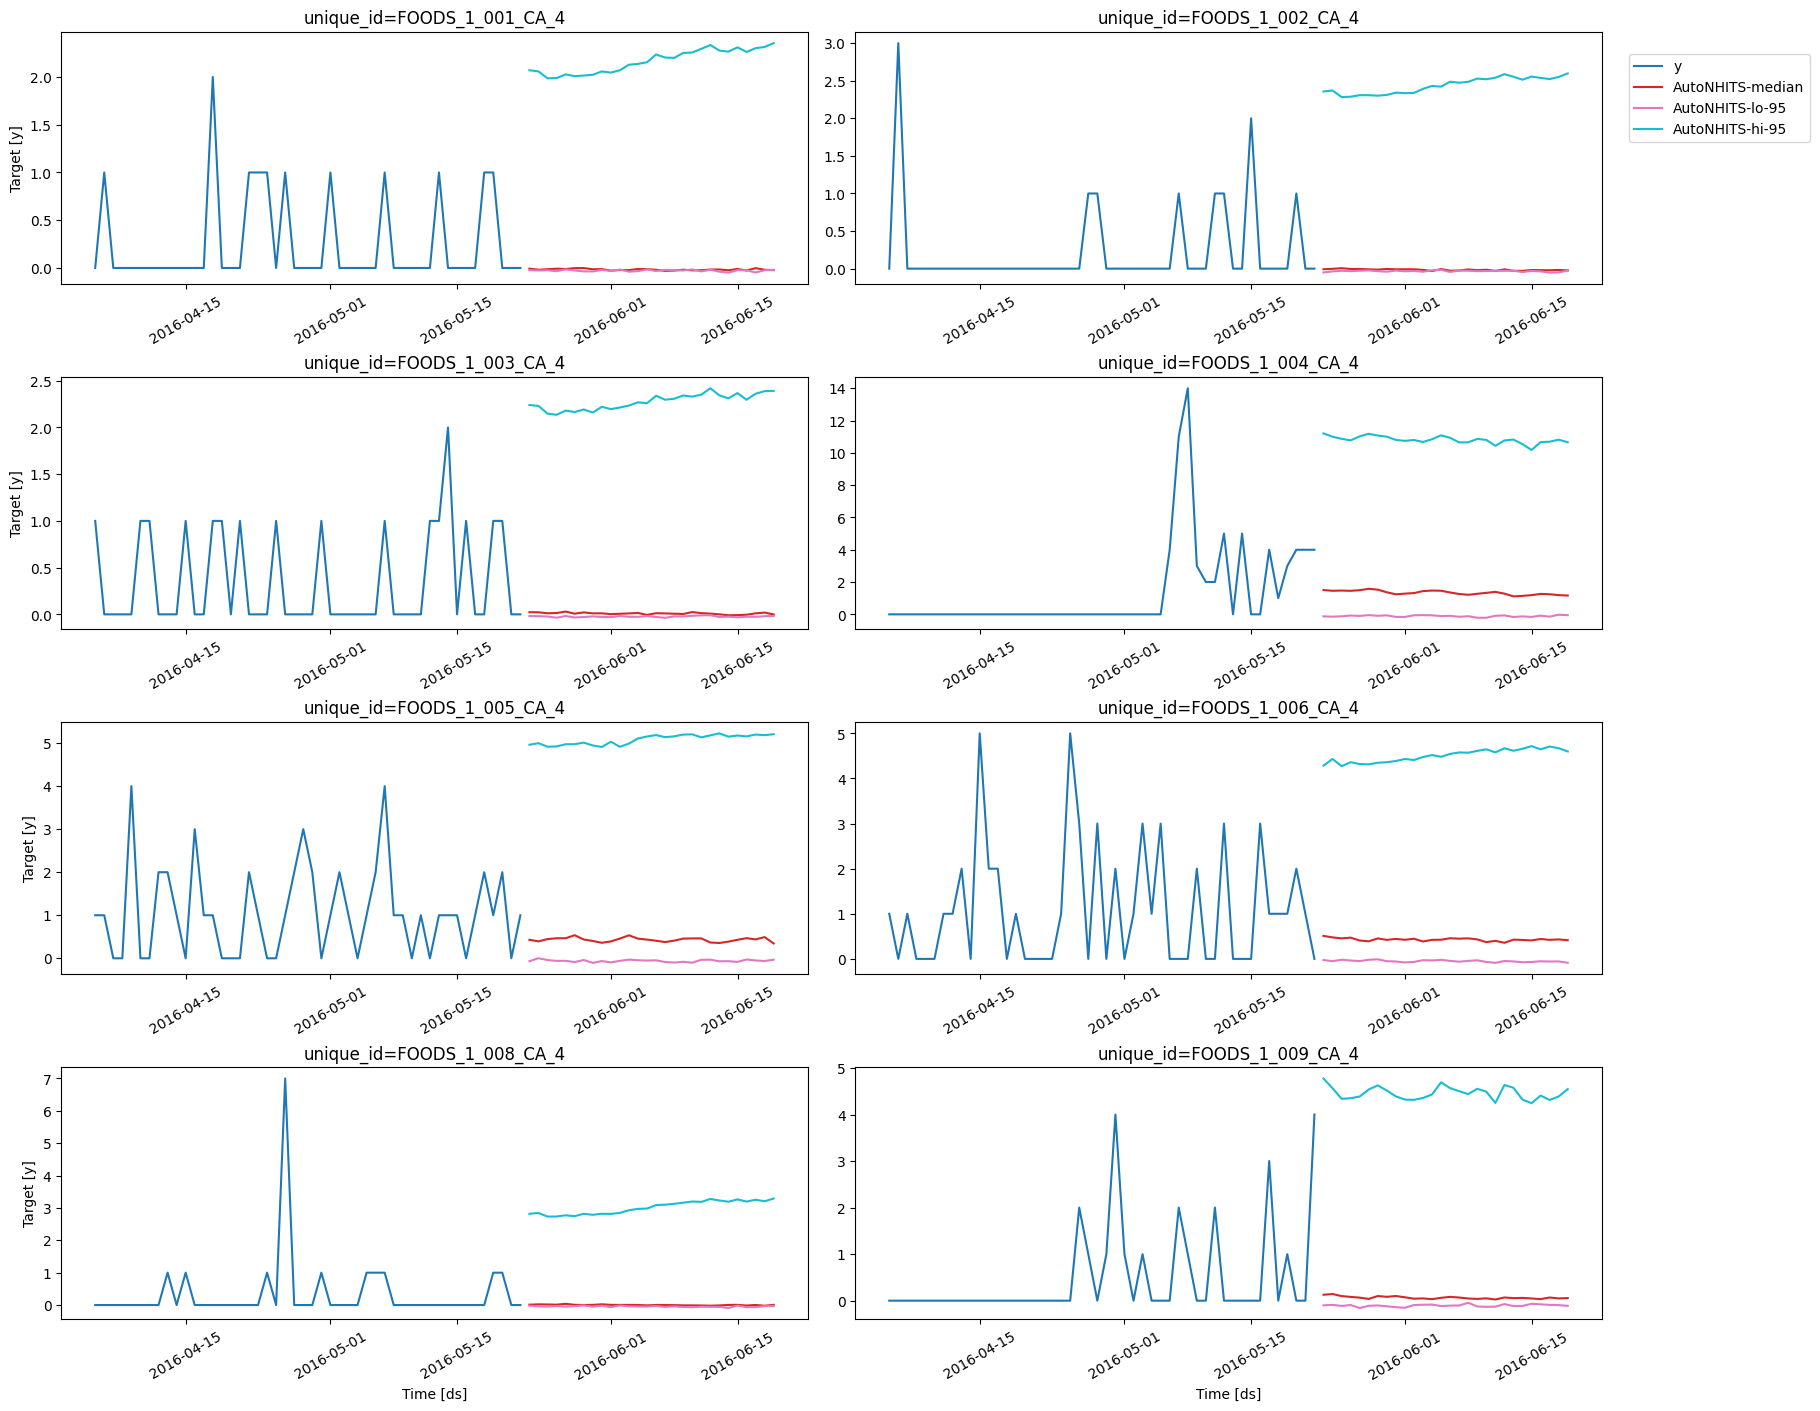

In [ ]:
plot_series(
    train,
    forecast_autonhits,
    plot_random=False,
    models=['AutoNHITS-median', 'AutoNHITS-lo-95', 'AutoNHITS-hi-95'],
    max_insample_length=48
)

# **CONCLUSÃO**

1. O AutoNHITS é o modelo com melhor desempenho global

Apresenta os menores erros absolutos médios (MAE) e também valores baixos de RMSE e MASE. Demonstra elevada capacidade para modelar padrões complexos na série temporal, mesmo sem apoio de variáveis externas.

2. As variáveis exógenas não melhoraram o desempenho
A adição de variáveis exógenas ao AutoNHITS levou a um ligeiro aumento no MAE (+0.59%).

Eventualmente porque as exógenas usadas não contêm informação relevante adicional para prever a série.

3. Modelos clássicos e de machine learning foram razoáveis, mas não os melhores

Os modelos estatísticos (ARIMA, ETS) tiveram bom desempenho, muito próximo entre si. Os modelos de machine learning (XGBoost, LightGBM) tiveram performance inferior.

4. As métricas como MASE e RMSSE confirmam robustez da avaliação
Os modelos com melhor MAE também apresentam menores MASE e RMSSE, o que valida a consistência entre as métricas.

O Seasonal Naive (baseline) ficou com MASE > 1, mostrando que todos os modelos superam a previsão trivial, como esperado.

**Conclusão Final**

O modelo AutoNHITS, sem variáveis exógenas, é o melhor modelo preditivo neste caso, apresentando os menores erros de previsão.

A introdução de variáveis exógenas não trouxe ganhos preditivos e, portanto, não se justifica a sua inclusão no modelo